# Lekcja 3: Wykresy

**Cele nauki Pythona**

1. Rozwiniesz dalsze umiejętności korzystania z funkcji.
2. Powtórzysz, jak zrobić listę.
3. Wykorzystasz koncepcje z poprzednich lekcji.

**Co będziesz w stanie zrobić z tymi umiejętnościami**

1. Nauczysz się rysować następujące rodzaje wykresów i diagramów:
     1. Wykres kołowy;
     2. Liniowy;
     3. Słupkowy;
     4. Histogram;
     5. Wykres punktowy.
2. Dowiesz się, jak możesz dostosować atrybuty, aby zmienić właściwości wykresu.
3. Dowiesz się więcej o *asocjacji* na wykresach punktowych.

Tworzenie wykresów w `pandas` jest stosunkowo proste. Aby je wykonać, należy na początek użyć funkcji `.plot`, po której następuje druga funkcja określająca jaki typ wykresu chcemy wykreślić. Przykładowo, aby wykonać wykres kołowy, nalezy użyć `.plot.pie()`. Poniżej znajduje się tabela różnych wykresów, które można wykreślić za pomocą `pandas`. Jeśli chcesz dowiedzieć się więcej, przeczytaj samouczek `pandas` [tutaj](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/04_plotting.html#min-tut-04-plotting) lub przeczytaj dokumentację [tutaj](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html).

|Typ|Funkcja|
|-|-|
|Wykres kołowy|`.plot.pie()`|
|Wykres liniowy|`.plot.line()`|
|Wykres słupkowy|`.plot.bar()`|
|Histogram|`.plot.hist()`|
|Wykres punktowy|`.plot.scatter()`|

**Wykresy kołowe**

Najpierw, jak zawsze, musimy zaimportować bibliotekę `pandas`.

In [1]:
import pandas as pd

Zacznijmy ten rozdział od danych, które wykorzystywaliśmy wcześniej o sklepie samochodowym. Poniższy kod tworzy i zapisuje tabelę przestawną w *DataFrame* o nazwie `CarShopPiv`.

In [2]:
CarShop = pd.read_csv(
    "https://raw.githubusercontent.com/ThomasJewson/datasets/master/CarShop.csv"
)

CarShopPiv = CarShop.pivot_table(
    index="Product",
    aggfunc=sum
)
CarShopPiv

Quantity  Total Price
Product                       
Oil             2           68
Turbo           3         1086
Tyre            7          343

Przydatnym sposobem wizualizacji tych danych może być wykres kołowy z kolumny `Total Price`.

Aby wykonać wykres kołowy, należy użyć następującej [funkcji](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html) `.plot.pie()`.

Musimy nadać tej funkcji argument, który przekazuje do funkcji informację, z której kolumny ma pobrać dane. Ponieważ kolumna, z której chcemy narysować wykres kołowy, to `Total Price`, musimy przekazać argument `y="Total Price"`.

<AxesSubplot:ylabel='Total Price'>

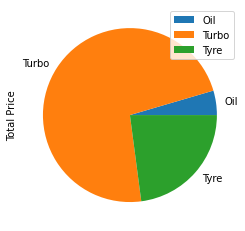

In [3]:
CarShopPiv.plot.pie(
    y="Total Price"
)

**Ćwiczenie 1:** *Wykreśl wykres kołowy kolumny `Quantity` z ramki danych `CarShopPiv`*

In [1]:
#Odpowiedź
CarShopPiv.plot.pie(y="Quantity")

NameError: name 'CarShopPiv' is not defined

**Wykresy liniowe**

Poniższe dane to procentowy wzrost Produktu Krajowego Brutto (PKB (ang. "GDP")) rocznie w UE i Niemczech w latach 2007-2018 [1].

In [5]:
GDP = pd.read_csv("https://raw.githubusercontent.com/ThomasJewson/datasets/master/GDP.csv")
GDP

Year   EU  Germany
0   2007  3.1      3.0
1   2008  0.5      1.0
2   2009 -4.3     -5.7
3   2010  2.1      4.2
4   2011  1.7      3.9
5   2012 -0.4      0.4
6   2013  0.3      0.4
7   2014  1.8      2.2
8   2015  2.3      1.7
9   2016  2.0      2.2
10  2017  2.5      2.5
11  2018  2.0      1.5

Jeśli chcemy wykreślić wykres liniowy, musimy ponownie użyć funkcji `.plot`. Jednak tym razem użyjemy razem z nią funkcji `.line()` dla wykresu liniowego. Dlatego nasza [funkcja](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.line.html) to `.plot.line()`.

Wykres liniowy ma dwa wymiary: oś x i oś y. Spróbujmy wykreślić kolumnę `Year` na osi X i kolumnę `EU` na osi Y. Aby to zrobić musimy przekazać argumenty słów kluczowych do funkcji, wskazując, jakie kolumny powinny być osią x, a jakie osią y. Argumentem osi y, jak widzieliśmy wcześniej, będzie `y="EU"`, podobnie argument osi x to `x="year"`.

Zauważmy, że w tej funkcji mamy tylko słowa kluczowe, więc kolejność argumentów nie ma znaczenia.

<AxesSubplot:xlabel='Year'>

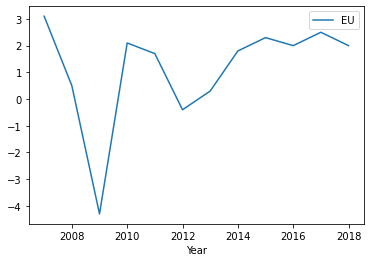

In [6]:
GDP.plot.line(
    x="Year",
    y="EU"
)

Możliwa jest zmiana atrybutów wykresu poprzez wprowadzenie do funkcji większej liczby argumentów słów kluczowych. Na przykład możemy użyć następujących argumentów.

|Argument|Opis|Typ zmiennej do przypisania|Przykład|
|-|-|-|-|
|`color`|Zmienia kolor wykresu|Ciąg \ lista ciągów|`color = "orange"`|
|`figsize`|Zmienia rozmiar wykresu wyjściowego|Lista dwóch liczb, szerokość i wysokość|`figsize = [5,6]`|
|`fontsize`|Zmienia wielkość czcionki na wykresie|Integer|`fontsize = 10`|
|`title`|Dodaje tytuł do wykresu|String|`title = "To jest mój wykres"`|
|`grid`|Dodaje siatkę do wykresu|Boolean / True or False|`grid = True`|
|`xlim`|Granice na wykresie osi x|Lista dwóch liczb, dolna i górna granica|`xlim = [451231]`|
|`ylim`|Granice na wykresie osi y|Lista dwóch liczb, dolna i górna granica|`ylim = [0.023,1.505]`|
|`rot`|Kąt obrotu etykiet na osi x|Liczba całkowita|`rot = 25`|

**Uwaga, używana jest amerykańska pisownia koloru.**

<AxesSubplot:title={'center':"Change in EU's GDP (%) vs. Time"}, xlabel='Year'>

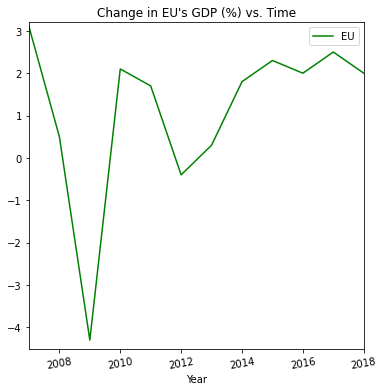

In [7]:
GDP.plot.line(
    x="Year",
    y="EU",
    
    color="green", #Uwaga, używana jest amerykańska pisownia koloru.
    figsize=[6,6],
    fontsize=10,
    title="Change in EU's GDP (%) vs. Time",
    grid=False,
    xlim=[2007,2018],
    ylim=[-4.5,3.2],
    rot=10
)

Wszystkie te argumenty można dostosować i zmienić. Na przykład argumentem koloru może być `green`, `red`, `blue`, `orange`, `purple`... itd.

Pobaw się argumentami zmieniając je w funkcji, aby zobaczyć i zrozumieć, w jaki sposób wpływają one na ostateczny wygląd wykresu.

<AxesSubplot:title={'center':"Change in EU's GDP (%) vs. Time"}, xlabel='Year'>

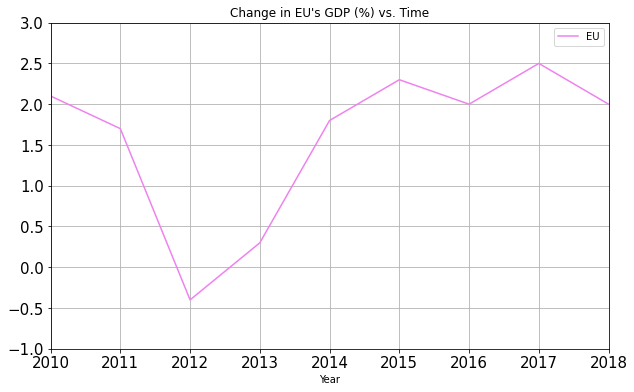

In [8]:
GDP.plot.line(
    x="Year",
    y="EU",
    
    color="violet",
    figsize=(10,6),
    fontsize=15,
    title="Change in EU's GDP (%) vs. Time",
    grid=True,
    xlim=(2010,2018),
    ylim=(-1,3)
)

**Zadanie 2:** *Wykreśl wykres liniowy, na którym oś X to `year`, a oś Y to `Germany` na podstawie ramki danych `GDP`. Zmień kolor linii na `black` i nadaj wykresowi tytuł `Change in Germanys GDP (%) vs. Time`.*

<AxesSubplot:title={'center':'Change in Germanys GDP (%) vs. Time'}, xlabel='Year'>

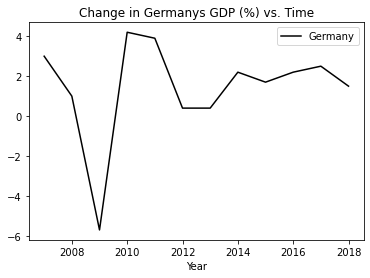

In [9]:
#Answer
GDP.plot.line(
    x="Year",
    y="Germany",
    color="black",
    title="Change in Germanys GDP (%) vs. Time"
)

Możemy również wykreślić różne kolumny danych na tym samym wykresie. Na przykład poniżej wykreśliliśmy kolumny `UE` i `Germany` na osi y, umieszczając dwie kolumny na liście `y=[„UE”,„Germany”]`.

<AxesSubplot:xlabel='Year'>

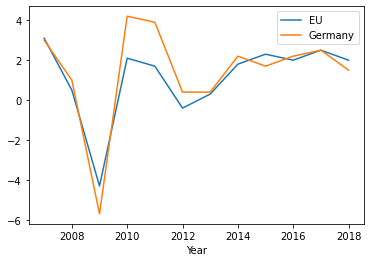

In [10]:
GDP.plot.line(
    x="Year",
    y=["EU","Germany"]
)

Ponownie możemy dostosować kolor i inne atrybuty wykresu. Zwróć uwagę, że kolory również znajdują się w liście.

Z tabel `y=["EU","Germany"]` i `color=["blue","orange"]`, wynikiem będzie linia `UE` w kolorze niebieskim, a linia `Niemcy` w kolorze pomarańczowym. Dzieje się tak dlatego, że argumenty są przypisywane do siebie w takiej samej kolejności, w jakiej były wprowadzone.

<AxesSubplot:title={'center':'Change in GDP (%) over time'}, xlabel='Year'>

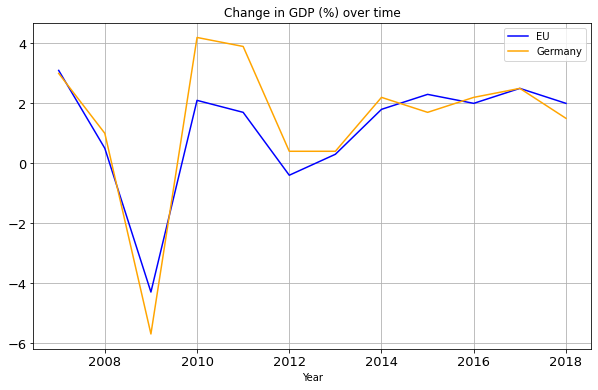

In [11]:
GDP.plot.line(
    x="Year",
    y=["EU","Germany"],
    
    title="Change in GDP (%) over time",
    color=["blue","orange"],
    grid=True,
    figsize=(10,6),
    fontsize=13
)

**Zadanie 3:** *Wykreśl wykres liniowy, na którym oś X to `Year`, a oś Y to `Germany` i `UE` na podstawie ramki danych `GDP`. Nadaj linii `EU` kolor `green`, a linii `Germany` kolor `yellow`. Na koniec ustaw siatkę wykresu na wartość `True`.*

<AxesSubplot:xlabel='Year'>

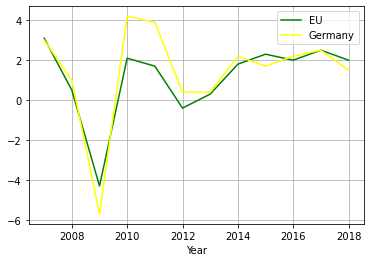

In [12]:
#Answer
GDP.plot.line(
    x="Year",
    y=["EU","Germany"],
    color=["green","yellow"],
    grid=True
)

**Wykresy słupkowe**

Aby utworzyć wykres słupkowy, należy użyć następującej [funkcji](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html) `.plot.bar ()`. Wykresy słupkowe mają dokładnie te same argumenty, co wykresy liniowe.

<AxesSubplot:title={'center':"Change in EU's GDP (%) vs. Time"}, xlabel='Year'>

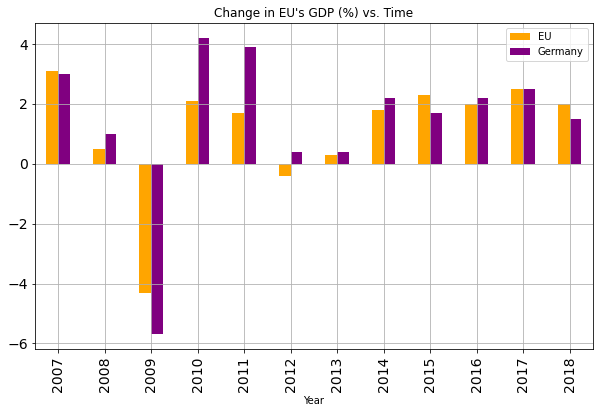

In [13]:
GDP.plot.bar(
    x="Year",
    y=["EU","Germany"],
    
    color=["orange","purple"],
    title="Change in EU's GDP (%) vs. Time",
    grid=True,
    figsize=(10,6),
    fontsize=14
)

**Ćwiczenie 4:** *Wykreśl wykres słupkowy, na którym oś x to `Year`, a oś y to `Germany`. Oznacza to, że słupki `Germany` mają kolor `red`. Ustaw rozmiar figury `(15,8)` i rozmiar czcionki `17`.*

<AxesSubplot:xlabel='Year'>

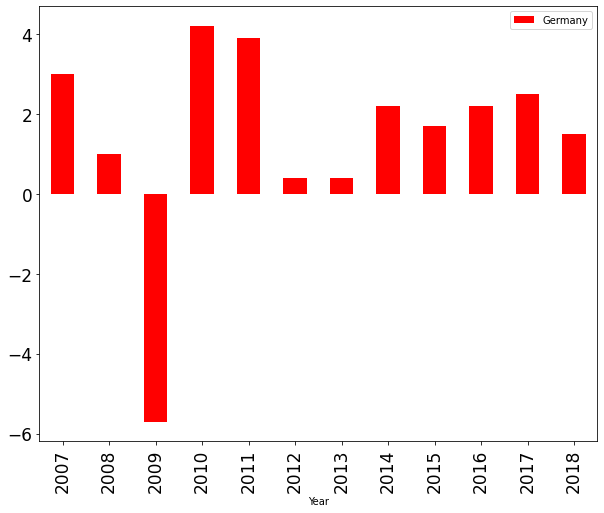

In [14]:
#Answer
GDP.plot.bar(
    x="Year",
    y="Germany",
    color="red",
    figsize=(10,8),
    fontsize = 17
)

**Histogramy**

Wykres histogramu pokazuje częstotliwość występowania poszczególnych wartości. Ogólnie rzecz biorąc, jeśli kilka wartości jest do siebie bardzo zbliżonych i stanowią większość naszego zbioru danych, to częstotliwość ich występowania jest duża, a wykres histogramu wskaże właśnie ten zakres jako najwyższy na wykresie.

Poniżej znajduje się zbiór danych zawierający informacje o nieudanych start-up'ach w mediach społecznościowych.

In [15]:
StartUp = pd.read_csv("https://raw.githubusercontent.com/ThomasJewson/datasets/master/startup.csv")
StartUp

Name  Creation_Year  Failure_Year    Outcome
0     Frankly           2004          2016  Shut Down
1  Formspring           2009          2013  Shut Down
2     Yik Yak           2013          2017  Shut Down
3   TeeBeeDee           2007          2009  Shut Down
4     Gowalla           2007          2013   Acquired
5  Friendster           2001          2015  Shut Down
6       Moped           1998          2014   Acquired
7        Vine           2012          2017  Shut Down
8      Secret           2013          2015  Shut Down

Obliczmy liczbę lat aktywności każdego z tych start-upów i wstawmy nową kolumnę o nazwie `Operating_Years` do *DataFrame*. Funkcja `.insert()` pochodzi z sekcji zaawansowanej w lekcji 1, dlatego nie martw się, jeśli nie widziałeś jej wcześniej.

In [16]:
StartUp.insert(
    3,
    "Operating_Years",
    StartUp["Failure_Year"] - StartUp["Creation_Year"]
)
StartUp

Name  Creation_Year  Failure_Year  Operating_Years    Outcome
0     Frankly           2004          2016               12  Shut Down
1  Formspring           2009          2013                4  Shut Down
2     Yik Yak           2013          2017                4  Shut Down
3   TeeBeeDee           2007          2009                2  Shut Down
4     Gowalla           2007          2013                6   Acquired
5  Friendster           2001          2015               14  Shut Down
6       Moped           1998          2014               16   Acquired
7        Vine           2012          2017                5  Shut Down
8      Secret           2013          2015                2  Shut Down

[Funkcja](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.hist.html) `.plot.hist()` do wykreślenia histogramu jest podobna do tego, co widzieliśmy w poprzednim przykładzie. Musimy zdefiniować, jaką kolumnę chcemy ustawić jako częstotliwość. W tym przypadku będzie to kolumna `Operating_Years`. Dlatego wbrew intuicji tworzymy `y=Operating_Years`. Jest to sprzeczne z intuicją, ponieważ oś x przedstawia `Operating_Years`, podczas gdy oś y przedstawia częstotliwość `Operating_Years`.

Na koniec musimy zdefiniować liczbę `bins` na wykresie histogramu, czyli szerokość zakresu. Liczba przedziałów to szerokość zakresu, na który dzielimy zbiór danych z osi x. Na przykład, poniżej mamy `bins=7`, co oznacza, że oś x — będąca wykresem `Operating_Years` — zostanie podzielona na 7 równych części. Ponieważ nasze `Operating_Years` wahają się od 2 lat do 16 lat, to szerokość całego zbioru x wynosi 16-2 USD = 14 USD. Jeśli szerokość naszego zbioru x (14 USD) podzielimy na 7 równych części (bins=7) wtedy przekonamy się, że szerokość naszego przedziału to 14 USD / 7 = 2 USD.

<AxesSubplot:ylabel='Frequency'>

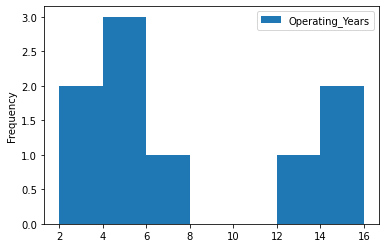

In [17]:
StartUp.plot.hist(
    y="Operating_Years",
    bins=7
)

Teraz spójrz na pierwszy przedział na powyższym wykresie, który rozciąga się od `Operating_Years = 2` do `Operating_Years = 4`. Jego częstotliwość to 2. Dzieje się tak, ponieważ istnieją dwie firmy, które mają okres działania od 2 do 4 lat. Oznacza to, że każda z firm, która działała przez okres od 2 do 4 lat, zostanie dodana do "pudełka" z pierwszego zakresu i jego częstotliwość zwiększy się wtedy o 1. 

Te same argumenty słów kluczowych, które kontrolują atrybuty wykresów, które widzieliśmy na wykresach liniowych, działają również w funkcji histogramu `.plot.hist()`. Co więcej, przy tej samej składni możliwe jest wykreślenie wielu histogramów na tym samym wykresie.

**Ćwiczenie 4:** *Wykreśl histogram na podstawie DataFrame `StartUp` z `11` pojemnikami.*

<AxesSubplot:ylabel='Frequency'>

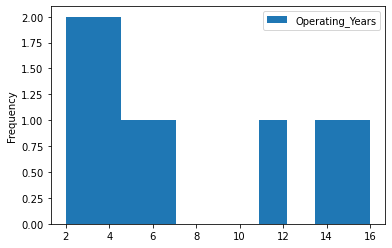

In [18]:
#Answers
StartUp.plot.hist(
    y="Operating_Years",
    bins=11
)

**Wykresy punktowe**

Wykres punktowy to wykres, który wyświetla wartości dwóch zmiennych ze zbioru danych poprzez umieszczenie znacznika w miejscu współrzędnych tych dwóch wartości(x,y). Czyli każdy znacznik będzie się znajdował w punkcie (x,y) na wykresie, z czego x i y będą wartościami pobranymi z argumentów funkcji.

Aby narysować wykres punktowy, musimy użyć [funkcji](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html) `.plot.scatter()`. Do funkcji należy przekazać dwa argumenty, oś x i oś y.

Poniższe dane pochodzą z 1951 roku i stanowią przekrojową analizę 24 brytyjskich firm autobusowych. [2]

[Funkcja](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) `.head()` pokazuje pierwsze 5 wierszy *DataFrame*. Jest to dobry sposób, aby szybko zobaczyć, jak wygląda *DataFrame* bez konieczności wyprowadzania całej rzeczy — która może mieć o wiele więcej wierszy.

In [19]:
bus = pd.read_csv("https://raw.githubusercontent.com/ThomasJewson/datasets/master/BritishBusCompanies1951/BritishBusCompanies1951-LinReg-1951.csv")
bus.head() #ta funkcja "głowa" pokaże tylko pierwsze 5 wierszy

Expenses per car mile (pence)  Car miles per year (1000s)  \
0                          19.76                        6235   
1                          17.85                       46230   
2                          19.96                        7360   
3                          16.80                       28715   
4                          18.20                       21934   

   Percent of Double Deckers in fleet  Percent of fleet on fuel oil  \
0                              100.00                        100.00   
1                               43.67                         84.53   
2                               65.51                         81.57   
3                               45.16                         93.33   
4                               49.20                         83.07   

   Receipts per car mile (pence)  
0                          25.10  
1                          19.23  
2                          21.42  
3                          18.11  
4                          19.24

Chcemy wykreślić `Expenses per car mile (pence)` (wydatki na milę) względem `Car miles per year (1000s)` (ile mil pokonuje samochód w ciągu roku) na wykresie punktowym, aby sprawdzić, czy występuje trend.

<AxesSubplot:xlabel='Car miles per year (1000s)', ylabel='Expenses per car mile (pence)'>

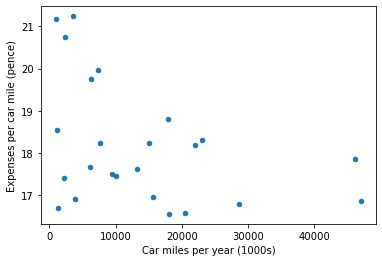

In [20]:
bus.plot.scatter(
    y="Expenses per car mile (pence)",
    x="Car miles per year (1000s)"
)

Na powyższym wykresie można zauważyć, że trend opada w dół. Formalnie mówimy, że wykres pokazuje *association*. *Association* mówi o tym, że w miarę jak firmy autobusowe mają więcej *mil przejechanych rocznie samochodami*,  to równocześnie *wydatki na kilometr samochodowy* spadają.

*Association* spadająca w dół jest znana jako *negative association*, podobnie przeciwieństwo to *positive association* - jak widać na poniższym wykresie punktowym.

<AxesSubplot:xlabel='Expenses per car mile (pence)', ylabel='Receipts per car mile (pence)'>

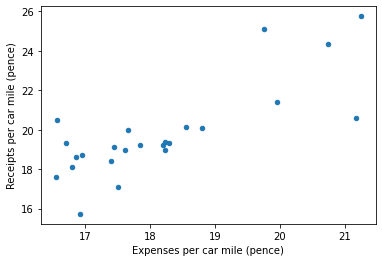

In [21]:
bus.plot.scatter(
    y="Receipts per car mile (pence)",
    x="Expenses per car mile (pence)"
)

*Positive association* mówi o tym, że wraz ze wzrostem *wydatków na przejazd kilometra samochodem*, wzrastają również *rachunki za przejazd kilometra samochodem*.

Podobnie, jak w przypadku innych wykresów, możemy również wprowadzić do funkcji dodatkowe atrybuty, aby dostosować wykresy.

<AxesSubplot:title={'center':'Scatter plot showing positive association between expenses and receipts'}, xlabel='Expenses per car mile (pence)', ylabel='Receipts per car mile (pence)'>

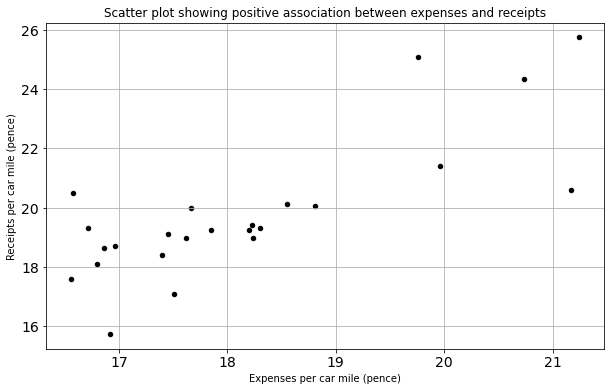

In [22]:
bus.plot.scatter(
    y="Receipts per car mile (pence)",
    x="Expenses per car mile (pence)",
    
    color="black",
    title="Scatter plot showing positive association between expenses and receipts",
    grid=True,
    figsize=(10,6),
    fontsize=14
)

Dzięki wykresom punktowym można dodać kolejny wymiar do danych, dostosowując kolor/odcień znaczników zgodnie z ich wartością.

Na przykład poniżej wykreśliliśmy `Percent of fleet on fuel oil` jako odcień wykresów, dołączając argument `c="Percent of fleet on fuel oil"`.

Nie możemy jednak jednocześnie używać atrybutu `color` i tej funkcjonalności.

<AxesSubplot:title={'center':'Scatter plot showing positive association between expenses and receipts'}, xlabel='Expenses per car mile (pence)', ylabel='Receipts per car mile (pence)'>

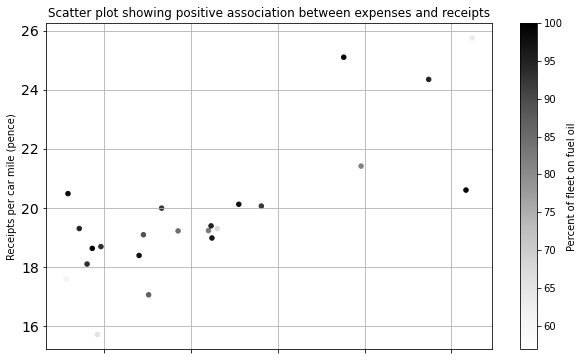

In [23]:
bus.plot.scatter(
    y="Receipts per car mile (pence)",
    x="Expenses per car mile (pence)",
    c="Percent of fleet on fuel oil",
    
    title="Scatter plot showing positive association between expenses and receipts",
    grid=True,
    figsize=(10,6),
    fontsize=14
)

**Ćwiczenie 5:** *Narysuj wykres punktowy, na którym oś x to `Percent of Double Deckers in fleet`, a oś y to `Percent of fleet on fuel oil`*

<AxesSubplot:xlabel='Percent of Double Deckers in fleet', ylabel='Percent of fleet on fuel oil'>

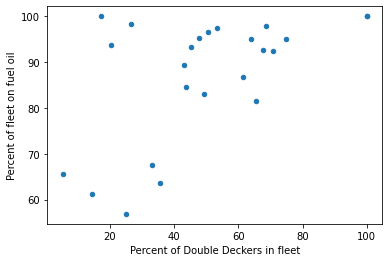

In [25]:
#Answer
bus.plot.scatter(
    x="Percent of Double Deckers in fleet",
    y="Percent of fleet on fuel oil"
)

**Wnioski**

*Powinieneś być teraz w stanie wykonać następujące czynności:*
1. Utworzyć następujące wykresy z następującymi funkcjami:
     1. Wykresy kołowe z `.plot.pie()`;
     2. Wykresy liniowe z `.plot.line()`;
     3. Wykresy słupkowe z `.plot.bar()`;
     4. Wykresy histogramu z `.plot.bar()`;
     5. Wykresy punktowe za pomocą `.plot.scatter()`.
2. Dostosować argumenty poprzednich funkcji, aby zmienić następujące elementy:
     1. Kolor;
     2. Rozmiar rysunku;
     3. Tytuły i rozmiary czcionek;
     4. Linie siatki.

**Źródła:**

[1] https://data.worldbank.org/indicator/NY.GDP.MKTP.KD.ZG?locations=EU

[2] J. Johnston (1956), "Scale, Costs, and Profitability in Road
Passenger Transport," The Journal of Industrial Economics Vol 4, pp207-223.